In [1]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


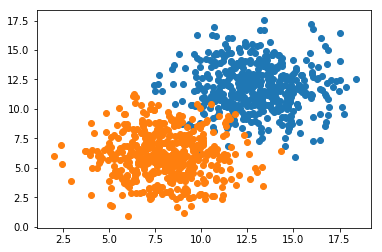

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1000/1000 [==============================] - 0s 304us/step - loss: 1.4942 - acc: 0.5360
Epoch 2/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.6433 - acc: 0.6010
Epoch 3/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.4450 - acc: 0.8470
Epoch 4/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.3870 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.3436 - acc: 0.9060
Epoch 6/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.3106 - acc: 0.9250
Epoch 7/500
1000/1000 [==============================] - 0s 22us/step - loss: 0.2913 - acc: 0.9310
Epoch 8/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2635 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.2370 - 

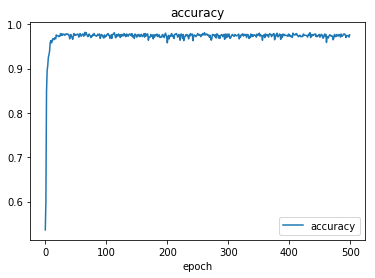

In [4]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

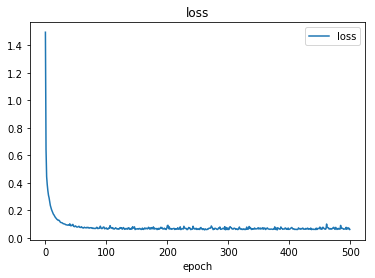

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [8]:
# We are going to plot our data set along with the precis decision boundray that will separate our 
# categorical results. The equation for this decisive boundary layer is obtained directly from the
# NN after it goes through the entire training procedure.
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

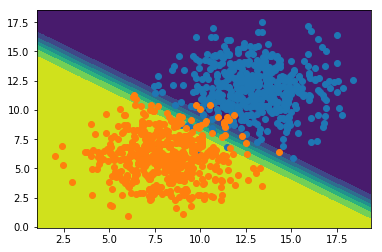

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

Prediction is  [[0.9999856]]


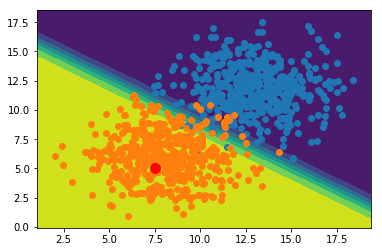

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize = 10, color = "red")

print("Prediction is " , prediction)